## TOPIC EXTRACTION AND VISUALIZATION - CHECK HOW TOPICS OF EACH COMMENT CONNECT TO EACH OTHER

In [1]:
import pandas as pd

# Read the .csv file
data_def = pd.read_csv('data/ministryofdefence_final.csv')
my_cols = data_def.columns.to_list()
print(my_cols)

['16181', 'term_id', 'name', 'post_title', 'comment_content', 'word_count', 'has_emoji', 'tok_comments', 'tok_comments_no_stopwords', 'tok_comments_with_stopwords', 'comments_no_stopwords', 'comments_with_stopwords', 'lemmatized_comments_no_stopwords', 'word_count_no_stopwords', 'ner_entities', 'pos_tags_no_stopwords']


In [2]:
import numpy as np


def extract_comments_for_article(df, column, article):
    df_article = df[df[column] == article] 
    return df_article

# Extract the comments for a random article for term_id=74
df_74 = data_def[data_def['term_id'] == 74]
articles_74 = np.unique(df_74[my_cols[3]])

df_74_01 = extract_comments_for_article(df_74, my_cols[3], articles_74[0])
print(f'Number of comments for article: "{articles_74[0]}" is: {len(df_74_01)}')

Number of comments for article: "Άρθρο 01 - Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων" is: 123


['Ρυθμίσεις περί σταδιοδρομίας και εξέλιξης στελεχών και οικονομικής μέριμνας και λογιστικού των Ενόπλων Δυνάμεων']


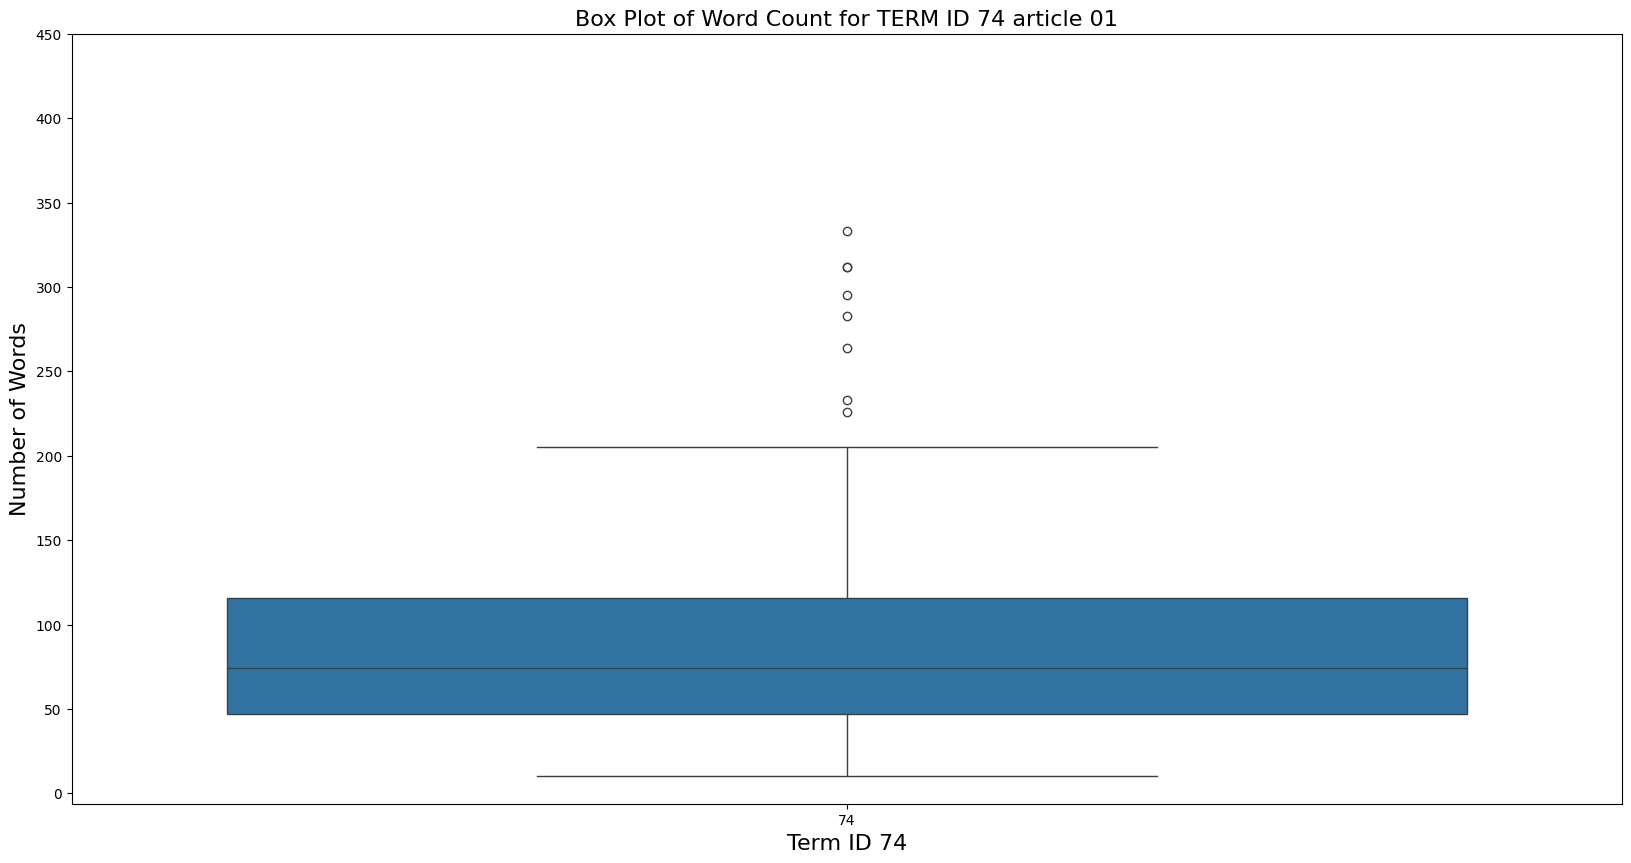

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


def avg_word_length(df, column, term_id, step_y_axis=200, max_y_position = 1500):
    """
    Function for plotting a histogram which show the avg
    and max word counts of each comment
    :param df: pandas dataframe which contains the text
    :param column: column of interest (str)
    :param term_id: article of interest (int)
    :return: plot of a histogram
    """
    # Calculate the maximum and minimum word count values

    df_term = df[df['term_id'] == term_id]
    print(np.unique(df_term['name']))

    median = df_term[column].median()
    sns.boxplot(x=my_cols[1], y=column, data=df_term)
    plt.axhline(median, xmin=0, xmax=0, label=f'Median for term_id {term_id}: {median}')
    # plt.text(0, 0, f'{median}', fontsize=12, ha='right', va='top')

    # Add labels and legend
    plt.xlabel("Term ID 74", fontsize=16)
    plt.ylabel('Number of Words', fontsize=16)
    plt.title(f"Box Plot of Word Count for TERM ID 74 article 01", fontsize=16)

    #Adjust the y axis
    max_word_count = df_term[column].max()
    y_tick_positions = [i for i in range(0, max_word_count + max_y_position, step_y_axis)]
    plt.yticks(y_tick_positions)
    

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
avg_word_length(df_74_01, 'word_count', 74, step_y_axis=50, max_y_position=150)
plt.show()

### CREATE A CLASS FOR GPT API IMPLEMENTATIONS

In [4]:
%%capture
# !pip install openai python-dotenv openpyxl
import openai
import os
from dotenv import load_dotenv
import openpyxl

In [5]:
class PromptingGPT:

    # Load API key and organization from environment variables
    load_dotenv("secrets.env")
    openai.api_key = os.getenv("OPENAI_API_KEY")
    openai.organization = os.getenv("OPENAI_ORGANIZATION")

    ClientOpenAi = openai.OpenAI(
            api_key= openai.api_key,
            organization= openai.organization
        )

    
    def make_prompts(self, prompt, GPT_model='gpt-3.5-turbo-0125'):
        """
        Create a conversation with a GPT model. With
        the following code you create a prompt with a GPT model
        :param prompt: str (input text)
        :param GPT_model: str (model to be selected)
        :return: response of GPT model
        """
        messages = [{'role': 'system', 'content': 'You are a helpful assistant.'}]
        messages.append({'role': 'user', 'content': prompt})

        response = openai.chat.completions.create(
            model=GPT_model,
            messages=messages,
            max_tokens=4000,
        )

        # Extract and print the model's reply
        reply = response.choices[0].message.content
        print(reply)

        # Update conversation history
        return reply

#### PROMPT FOR TOPIC EXTRACTION FOR EACH COMMENT

In [ ]:
# import time
# from tqdm import tqdm

# length_coms = len(df_74_01)
# topic_extraction_GPT = []
# for i in tqdm(range(length_coms)):
#     GPT_prompts = PromptingGPT() # Create a new instance of GPT model in each iteration
#     comment = df_74_01.iloc[i]['comments_with_stopwords']
#     prompt = f"""
#     Γεια σου, αγαπητό μοντέλο. Θα ήθελα να αναλύσεις και να εξάγεις τα ειδικά ζητήματα από το σχόλιο που θα σου παραθέσω. 
#     Το σχόλιο αφορά ένα νομικό άρθρο με τίτλο 'Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων'. Θα σου δώσω επίσης 
#     τα θέματα και ειδικά ζητήματα από τα 10 προηγούμενα σχόλια για το ίδιο θέμα, ώστε να μπορείς να εξάγεις παρόμοιες αναλύσεις εφόσον 
#     απαιτηθεί. Παρακαλώ να παρέχεις μόνο μια λίστα με τα ειδικά ζητήματα χωρίς επιπλέον σχόλια.
#     Προηγούμενα θέματα: {topic_extraction_GPT[-10:]}
#     Σχόλιο: {comment}
#     """

#     topic_extraction_GPT.append(GPT_prompts.make_prompts(prompt))
#     if i==int(length_coms/2):
#         time.sleep(20)

### READ THE .CSV FILE WITH THE RESULTS OF TOPIC/KEYWORD EXTRACTION

In [6]:
data_topics_df = pd.read_csv('summarization_results.csv')

print(data_topics_df.columns.to_list())

['summarized_comments_independent', 'summarized_comments_connected', 'summarized_comments_classified', 'keywords_GPT', 'keywords_textrank', 'final_summary_independent', 'final_summary_connected', 'final_summary_classified', 'topics_per_comments']


### IMPORT THE PROPER FUNCTIONS FOR THE TOPIC EXTRACTION/ANALYSIS

#### CREATE A GREEK TOKENIZER VIA TF-IDF VECTORIZER

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

nlp = spacy.load('el_core_news_sm', disable=["parser"])


def greek_tokenizer(document):
    """
    Tokenizer who removes punctuation
    :param document: string which is a text
    :return: tokenized text
    """
    return [token.text for token in nlp(document) if not token.is_space]


# Initialize TfidfVectorizer with the Greek tokenizer
vectorizer = TfidfVectorizer(tokenizer=greek_tokenizer)

#### CREATE A FUNCTION FOR RUN KMEANS ALGORITHM AND FIND THE OPTIMUM *K*

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


def calc_kmeans(X, k_values):
    """
    Plot the silhouettes scores
    in order to find the optimal k
    :param X: TF-IDF vectorized texts
    :param k_values: list of hyperparameter k values
    :return: two plots (silhoutette and elbo scores)
    """
    max_score = -1
    optimum_k = 0
    silhouette_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=43, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        # Compute the silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg>max_score:
            max_score = silhouette_avg
            optimum_k = k
        silhouette_scores.append(silhouette_avg)

    # Plotting the Silhouette Score
    plt.figure(figsize=(12, 6))
    plt.plot(k_values, silhouette_scores, marker='o', color='blue', label='Silhouette Score')
    plt.axvline(optimum_k, linestyle = '--', color=(0, 0, 1, 0.5), label=f'Optimum k is: {optimum_k}')
    plt.ylim(0, 0.3)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores by Number of Clusters')
    plt.legend()

    plt.show()


#### CREATE A GREEK LEMMATIZER

In [9]:
# Lemmatize each inner list for better clustering/grouping
def lemmatize_keywords(keywords):
    """
    Lemmatize a list of keywords
    :param keywords: list of tokenized words
    :return: list of lemmatized tokens
    """
    lemmatized_doc = []
    doc = nlp(keywords)
    for token in doc:
        if token.is_stop:
            # lemmatized_doc.append(str(token))
            continue
        else:
            lemmatized_doc.append(str(token.lemma_.lower()))
    return lemmatized_doc

#### FIND SIMILARITIES VIA COSINE AND THRESHOLDING

In [10]:
from sklearn.metrics.pairwise import cosine_similarity


def calc_cosine_threshold(X):
    """
    Group texts via cosine similarity and thresholding
    :param X: vectorized text
    :return: 2d-Array of cluster for all thresholds
    """

    cosine_sim = cosine_similarity(X)
    thresholds = [0.1 * i for i in range(1, 6)]
    clusters_all_thres = []

    for threshold in thresholds:
        clusters = {}
        cluster_id = 0
        for idx, row in enumerate(cosine_sim):
            existing_cluster = next((cluster for cluster, members in clusters.items() if idx in members), None)
            if existing_cluster is not None:
                continue
            clusters[cluster_id] = {idx}
            similar_indices = np.where(row > threshold)[0]
            for i in similar_indices:
                if i != idx:
                    clusters[cluster_id].add(i)
            cluster_id += 1
        clusters_all_thres.append(clusters)

    # Output clusters
    for i, clusters in enumerate(clusters_all_thres):
        threshold = (i + 1) * 0.1
        print(f'For threshold {threshold:.1f} the number of topics is: {len(clusters)}')

    return clusters_all_thres

### IMPLEMENT K-MEANS TO THE COMMENTS (WITH THE STOPWORDS) BY USING TF-IDF VECTORS

C:\1. Python\LLM_mods_Research\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\1. Python\LLM_mods_Research\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\1. Python\LLM_mods_Research\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


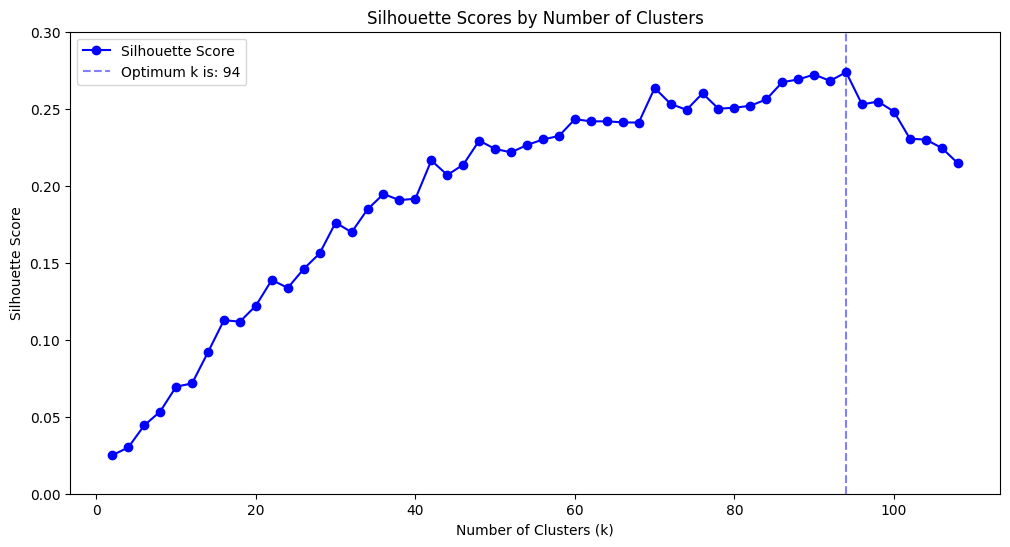

In [16]:
# Assuming df_74_01['comments_no_stopwords'] contains the preprocessed comments
all_comments = df_74_01['comments_with_stopwords'].tolist()


# Transform the comments into TF-IDF vectors
X_comments_all = vectorizer.fit_transform(all_comments)


k_values = range(2, 110, 2)
calc_kmeans(X_comments_all, k_values)

In [17]:
# Implement cosine_similarity with thresholding for grouping the results
clusters_comments_all = calc_cosine_threshold(X_comments_all)

For threshold 0.1 the number of topics is: 20
For threshold 0.2 the number of topics is: 52
For threshold 0.3 the number of topics is: 74
For threshold 0.4 the number of topics is: 82
For threshold 0.5 the number of topics is: 88


### IMPLEMENT K-MEANS TO THE COMMENTS (WITHOUT THE STOPWORDS) BY USING TF-IDF VECTORS

C:\1. Python\LLM_mods_Research\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


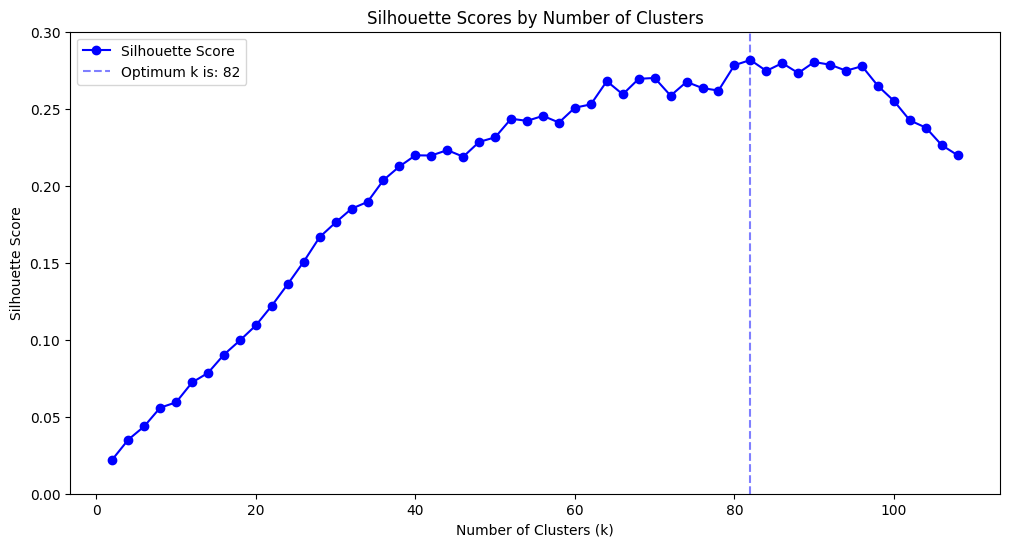

In [18]:
# Assuming df_74_01['comments_no_stopwords'] contains the preprocessed comments
all_comments_no_stop = df_74_01['comments_no_stopwords'].tolist()

# Transform the comments into TF-IDF vectors
X_comments_all_no_stop = vectorizer.fit_transform(all_comments_no_stop)


calc_kmeans(X_comments_all_no_stop, k_values)

In [19]:
# Implement cosine_similarity with thresholding for grouping the results
clusters_comments_no_stop = calc_cosine_threshold(X_comments_all_no_stop)

For threshold 0.1 the number of topics is: 44
For threshold 0.2 the number of topics is: 67
For threshold 0.3 the number of topics is: 81
For threshold 0.4 the number of topics is: 86
For threshold 0.5 the number of topics is: 92


### IMPLEMENT KMEANS TO THE KEYWORDS OF THE COMMENTS BY USING TF-IDF VECTORS

In [13]:
keywords_GPT = data_topics_df.iloc[:123]['keywords_GPT'].to_list()

print(keywords_GPT[:3])

["['εξέλιξη', 'ενεργά', 'προσφορά', 'εμπειρία', 'παράδειγμα', 'άξιοματικοί', 'μίμηση']", "['ευχάριστη', 'εξέλιξη', 'συνάδελφοι', 'ενέργεια', 'σύνταξη', 'κατηγορία', 'πολίτες']", "['θετικό σχόλιο', 'δικαίωμα', 'εμπειρία', 'προσφορά', 'σύνταξη', 'υπηρεσία', 'ένοπλες δυνάμεις']"]


In [14]:
import ast

# Remove the quotes "" for each inner list
keywords_GPT_ast = [ast.literal_eval(item) for item in keywords_GPT]
print(keywords_GPT_ast[:3])

[['εξέλιξη', 'ενεργά', 'προσφορά', 'εμπειρία', 'παράδειγμα', 'άξιοματικοί', 'μίμηση'], ['ευχάριστη', 'εξέλιξη', 'συνάδελφοι', 'ενέργεια', 'σύνταξη', 'κατηγορία', 'πολίτες'], ['θετικό σχόλιο', 'δικαίωμα', 'εμπειρία', 'προσφορά', 'σύνταξη', 'υπηρεσία', 'ένοπλες δυνάμεις']]


#### LEMMATIZE THE KEYWORDS

In [15]:
# Lemmatize the keywords
lemmatized_keywords = [lemmatize_keywords(' '.join(keywords)) for keywords in keywords_GPT_ast]
print(lemmatized_keywords[:3])

[['εξέλιξη', 'ενεργά', 'προσφορά', 'εμπειρία', 'παράδειγμα', 'άξιοματικός', 'μίμηση'], ['ευχάριστη', 'εξέλιξη', 'συνάδελφος', 'ενέργεια', 'σύνταξη', 'κατηγορία', 'πολίτης'], ['θετικός', 'σχόλιο', 'δικαίωμα', 'εμπειρία', 'προσφορά', 'σύνταξη', 'υπηρεσία', 'ένοπλος', 'δύναμη']]


#### FREQUENCY DISTRIBUTION FOR GPT KEYWORD EXTRACTION

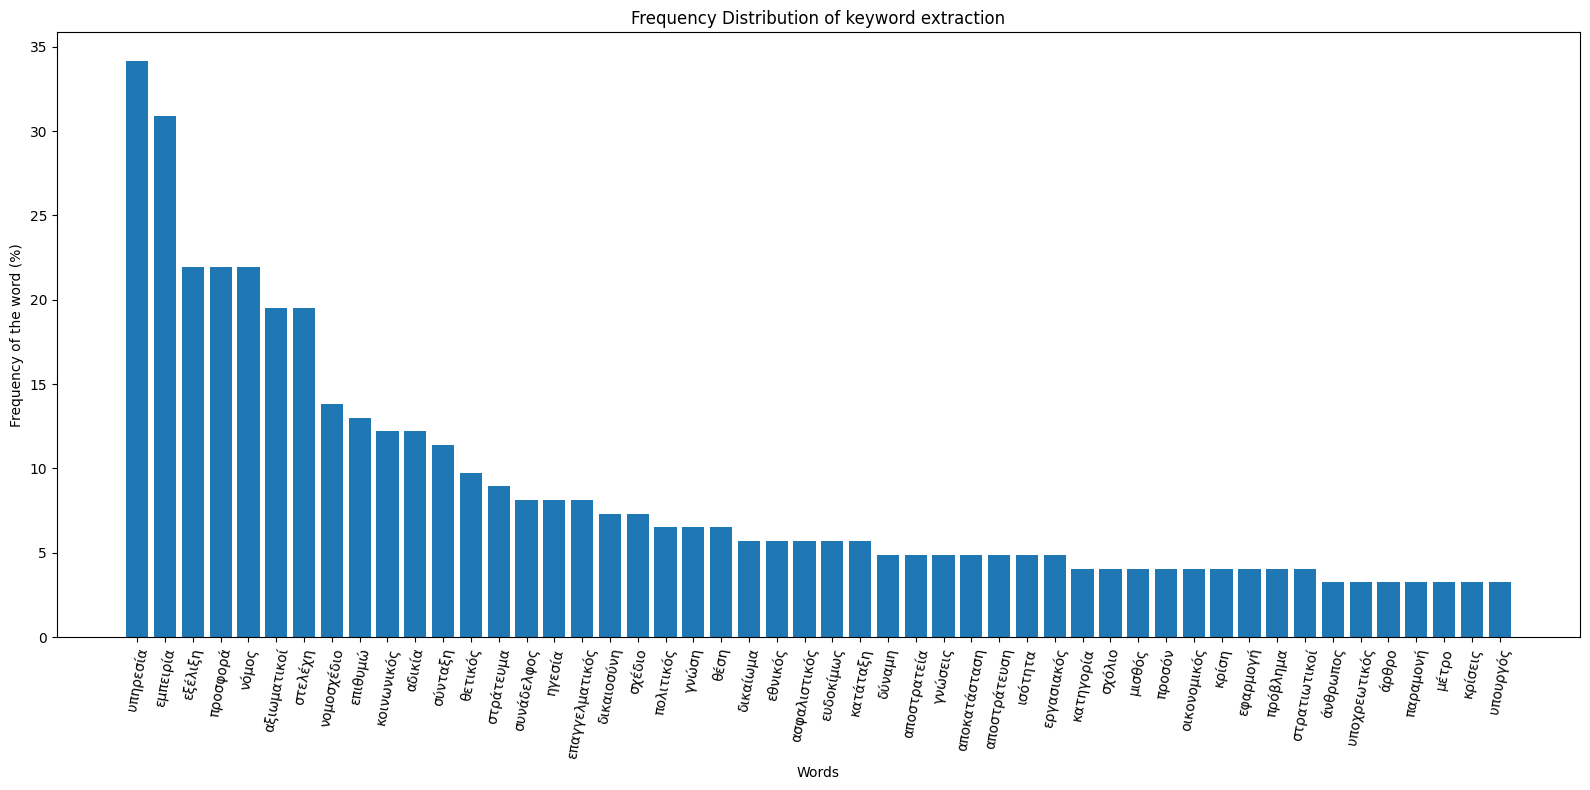

In [16]:
from collections import Counter

joined_lemmatized_keywords = [word.lower() for sublist in lemmatized_keywords for word in sublist]

# Counting the frequency of each keyword
keyword_GPT_frequency = Counter(joined_lemmatized_keywords)
most_common_keyword_50 = keyword_GPT_frequency.most_common(50)

def plot_most_common_keywords(most_common_words):
    """
    Calculate the most common token in an article in our dataset
    :param most_common_words: Counter for words (strings)
    :return: plot of the most common words
    """
    # Figure and plot size
    fig = plt.figure(figsize=(16, 8))
    
    # Plot the most frequent stopwords
    plt.bar([word for word, count in most_common_words], [100*count/len(lemmatized_keywords) for word, count in most_common_words])
    plt.xlabel('Words')
    plt.ylabel('Frequency of the word (%)')
    plt.title('Frequency Distribution of keyword extraction')
    plt.xticks(rotation=80)

    plt.tight_layout()
    plt.show()     

# Plot the frequency of the words
plot_most_common_keywords(most_common_keyword_50)

C:\1. Python\LLM_mods_Research\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


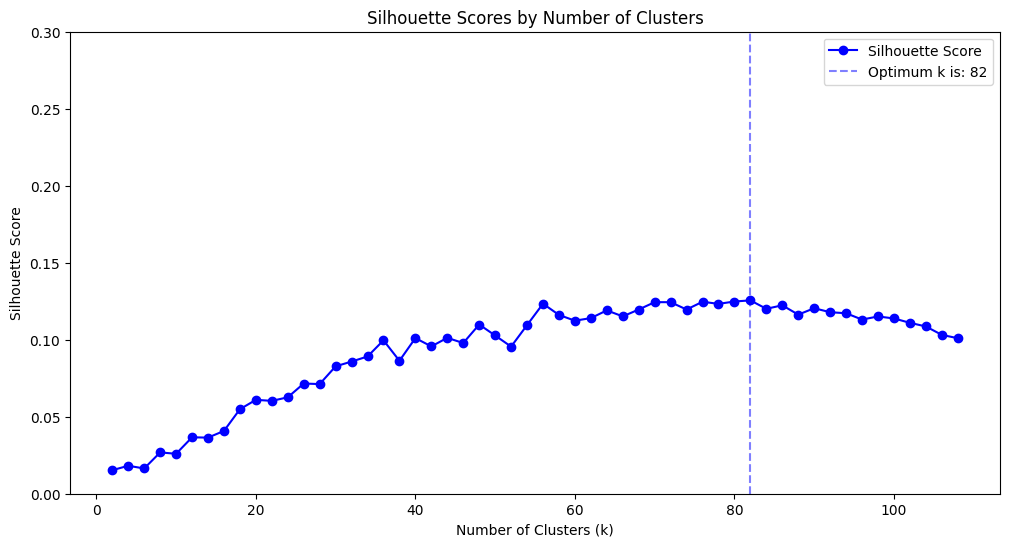

In [23]:
# Convert each sublist of comments into a single string
vectorized_lemmatized_GPT_comments = [" ".join(doc) for doc in lemmatized_keywords]

X_keyword_comments = vectorizer.fit_transform(vectorized_lemmatized_GPT_comments)

calc_kmeans(X_keyword_comments, k_values)

In [24]:
# Implement cosine_similarity with thresholding for grouping the results
clusters_keywords = calc_cosine_threshold(X_keyword_comments)

For threshold 0.1 the number of topics is: 27
For threshold 0.2 the number of topics is: 54
For threshold 0.3 the number of topics is: 85
For threshold 0.4 the number of topics is: 100
For threshold 0.5 the number of topics is: 106


### IMPLEMENT K-MEANS TO THE TOPICS BY USING TF-IDF VECTORS

In [20]:
from pprint import pprint

# Extract a list with the topics
topics_per_comment = data_topics_df.iloc[:123]['topics_per_comments'].to_list()

print(len(topics_per_comment))
pprint(topics_per_comment[0:3])

123
["[' Η σημασία της συνεχούς εκπαίδευσης για τα στελέχη.\\n', ' Η αξία της "
 'εμπειρίας στη διατήρηση της αξιοπιστίας και της αποτελεσματικότητας των '
 "στελεχών.\\n', ' Η σημασία του να είναι τα στελέχη παράδειγμα προς μίμηση "
 "για τους άλλους αξιωματικούς.']",
 "[' Η ευχάριστη εξέλιξη που αφορά τη δυνατότητα συνέχισης σε ενέργεια για "
 "στελέχη άνω των 35 ετών.\\n', ' Ταυτόχρονη διατήρηση στην ενεργό δράση παρά "
 "την ηλικία των στελεχών.\\n', ' Η αντιμετώπιση αρνητικών κριτικών και "
 "κατηγοριών από πολίτες σχετικά με την αποχώρηση για συνταξιοδότηση νωρίς.']",
 "[' Η δυνατότητα συνέχισης υπηρεσίας για αξιωματικούς με μεγάλη επαγγελματική "
 "εμπειρία.\\n', ' Η ενδεχόμενη ανάγκη τροποποίησης νομοθεσίας για την "
 "επιτροπή αυτής της διάταξης.\\n', ' Η συζήτηση γύρω από το θέμα της "
 'συνταξιοδότησης στις ένοπλες δυνάμεις και οι επιπτώσεις της στη λειτουργία '
 "τους.']"]


#### REMOVE THE QUOTES "" FOR EACH INNER LIST FOR THE EXTRACTED TOPICS

In [21]:
import ast 

# Remove the quotes "" for each inner list
topics_comments_ast = [ast.literal_eval(item) for item in topics_per_comment]
print(topics_comments_ast[:3])

[[' Η σημασία της συνεχούς εκπαίδευσης για τα στελέχη.\n', ' Η αξία της εμπειρίας στη διατήρηση της αξιοπιστίας και της αποτελεσματικότητας των στελεχών.\n', ' Η σημασία του να είναι τα στελέχη παράδειγμα προς μίμηση για τους άλλους αξιωματικούς.'], [' Η ευχάριστη εξέλιξη που αφορά τη δυνατότητα συνέχισης σε ενέργεια για στελέχη άνω των 35 ετών.\n', ' Ταυτόχρονη διατήρηση στην ενεργό δράση παρά την ηλικία των στελεχών.\n', ' Η αντιμετώπιση αρνητικών κριτικών και κατηγοριών από πολίτες σχετικά με την αποχώρηση για συνταξιοδότηση νωρίς.'], [' Η δυνατότητα συνέχισης υπηρεσίας για αξιωματικούς με μεγάλη επαγγελματική εμπειρία.\n', ' Η ενδεχόμενη ανάγκη τροποποίησης νομοθεσίας για την επιτροπή αυτής της διάταξης.\n', ' Η συζήτηση γύρω από το θέμα της συνταξιοδότησης στις ένοπλες δυνάμεις και οι επιπτώσεις της στη λειτουργία τους.']]


#### IMPLEMENT KMEANS AND COSINE SIMILARITY WITHOUT LEMMATIZATION

C:\1. Python\LLM_mods_Research\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


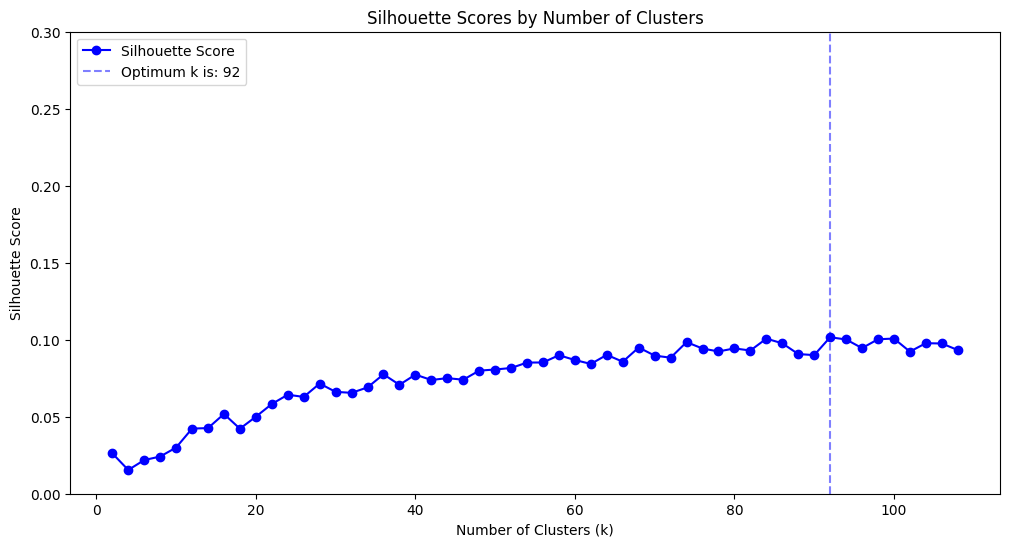

In [22]:
# Concatenate strings within each sublist
topic_extract_concatenated = [' '.join(sublist) for sublist in topics_comments_ast]

# Vectorize the lemmatized topics via TF-IDF vectorizer
X_topic_comments_concat = vectorizer.fit_transform(topic_extract_concatenated)

calc_kmeans(X_topic_comments_concat, k_values)

In [24]:
# Implement cosine_similarity with thresholding for grouping the results
clusters_topics = calc_cosine_threshold(X_topic_comments_concat)

For threshold 0.1 the number of topics is: 4
For threshold 0.2 the number of topics is: 33
For threshold 0.3 the number of topics is: 66
For threshold 0.4 the number of topics is: 91
For threshold 0.5 the number of topics is: 105


#### IMPLEMENT KMEANS AND COSINE SIMILARITY AFTER LEMMATIZATION

In [38]:
# Lemmatize the topics and remove the stopwords
lemmatized_topic_comments = [lemmatize_keywords(topic) for topic in topic_extract_concatenated]
print(lemmatized_topic_comments[:5])
print('-------------------------------------------------------------------------------------------------------------------------------------')

# Concatenate the topics of each comment for the vectorize into TF-IDF
topic_extract_concat_lemma = [' '.join(sublist).strip() for sublist in lemmatized_topic_comments]
print(topic_extract_concat_lemma[:5])

[[' ', 'σημασία', 'συνεχής', 'εκπαίδευση', 'στελέχη', '.', '\n  ', 'αξία', 'εμπειρία', 'διατήρηση', 'αξιοπιστία', 'αποτελεσματικότητα', 'στελεχών', '.', '\n  ', 'σημασία', 'στελέχη', 'παράδειγμα', 'μίμηση', 'αξιωματικός', '.'], [' ', 'ευχάριστος', 'εξέλιξη', 'αφορώ', 'δυνατότητα', 'συνέχιση', 'ενέργεια', 'στελέχη', '35', 'έτος', '.', '\n  ', 'ταυτόχρονη', 'διατήρηση', 'ενεργός', 'δράση', 'ηλικία', 'στελεχών', '.', '\n  ', 'αντιμετώπιση', 'αρνητικός', 'κριτικός', 'κατηγορία', 'πολίτης', 'σχετικά', 'αποχώρηση', 'συνταξιοδότηση', '.'], [' ', 'δυνατότητα', 'συνέχιση', 'υπηρεσία', 'αξιωματικός', 'μεγάλος', 'επαγγελματικός', 'εμπειρία', '.', '\n  ', 'ενδεχόμενος', 'ανάγκη', 'τροποποίηση', 'νομοθεσία', 'επιτροπή', 'διάταξη', '.', '\n  ', 'συζήτηση', 'θέμα', 'συνταξιοδότηση', 'ένοπλος', 'δύναμη', 'επίπτωση', 'λειτουργία', '.'], [' ', 'δυνατότητα', 'συνέχιση', 'υπηρεσία', 'στελέχη', '35', 'έτος', 'ειδικός', 'δύναμη', 'πολεμικός', 'ναυτικού', '.', '\n  ', 'εξασφαλιστεί', 'δυνατότητα', 'μετάδοση'

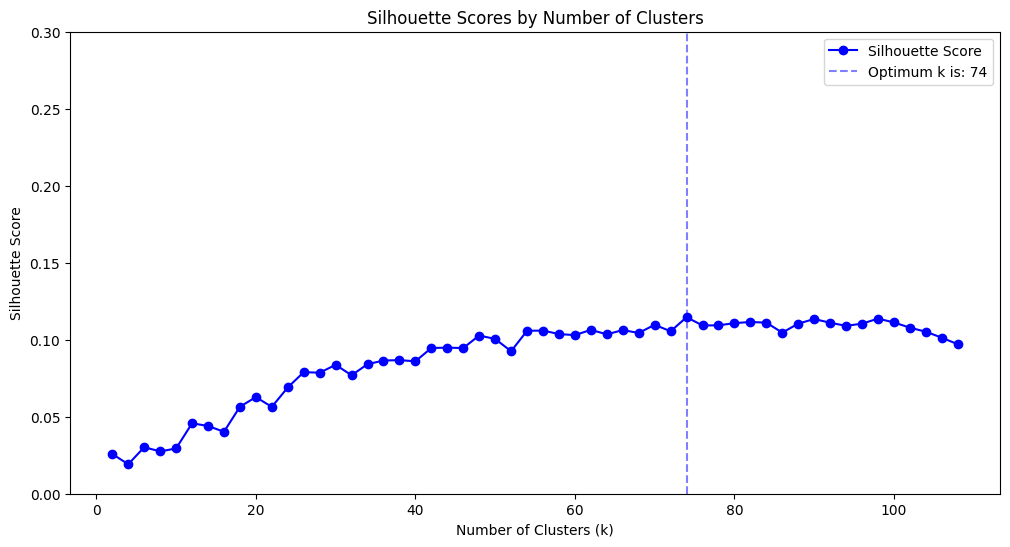

In [39]:
# Vectorize the lemmatized topics via TF-IDF vectorizer
X_topic_comments_lemma = vectorizer.fit_transform(topic_extract_concat_lemma)
k_values = range(2, 110, 2)

calc_kmeans(X_topic_comments_lemma, k_values)

In [32]:
# Implement cosine_similarity with thresholding for grouping the results
clusters_topics_lemma = calc_cosine_threshold(X_topic_comments_lemma)

For threshold 0.1 the number of topics is: 16
For threshold 0.2 the number of topics is: 42
For threshold 0.3 the number of topics is: 75
For threshold 0.4 the number of topics is: 94
For threshold 0.5 the number of topics is: 102


### TRY TO CLUSTER ALL THE TOPICS FOR ALL THE COMMENTS INDEPENDENTLY

In [26]:
topic_comments_flattened = [topic.strip() for sublist in topics_comments_ast for topic in sublist if topic!='']
print(len(topic_comments_flattened))
print(topic_comments_flattened[:5])
print('-------------------------------------------------------------------------------------------------------------------------------------')

504
['Η σημασία της συνεχούς εκπαίδευσης για τα στελέχη.', 'Η αξία της εμπειρίας στη διατήρηση της αξιοπιστίας και της αποτελεσματικότητας των στελεχών.', 'Η σημασία του να είναι τα στελέχη παράδειγμα προς μίμηση για τους άλλους αξιωματικούς.', 'Η ευχάριστη εξέλιξη που αφορά τη δυνατότητα συνέχισης σε ενέργεια για στελέχη άνω των 35 ετών.', 'Ταυτόχρονη διατήρηση στην ενεργό δράση παρά την ηλικία των στελεχών.']
-------------------------------------------------------------------------------------------------------------------------------------


C:\1. Python\LLM_mods_Research\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


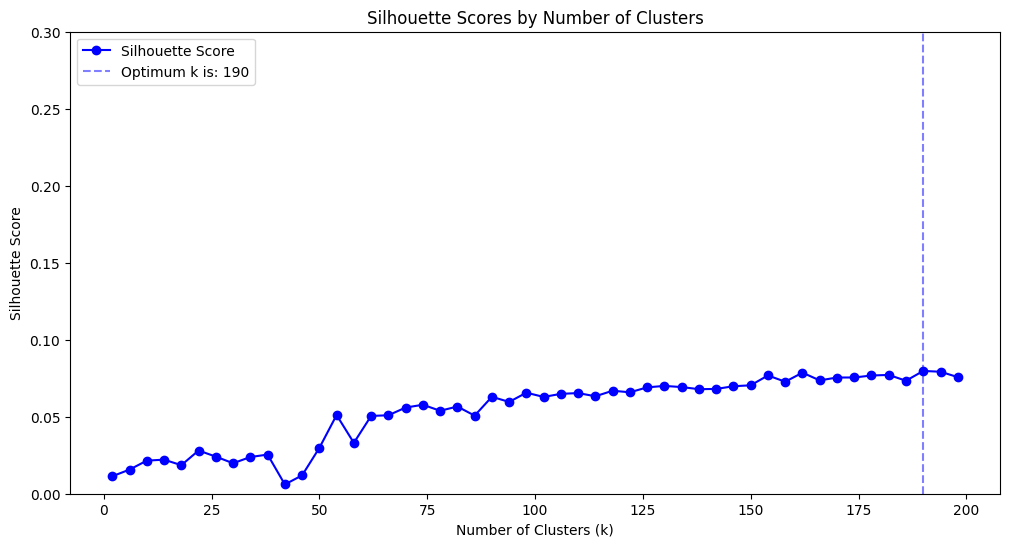

In [27]:
# Vectorize the lemmatized topics via TF-IDF vectorizer
X_topic_comments_all = vectorizer.fit_transform(topic_comments_flattened)

k_values = range(2, 200, 4)
calc_kmeans(X_topic_comments_all, k_values)

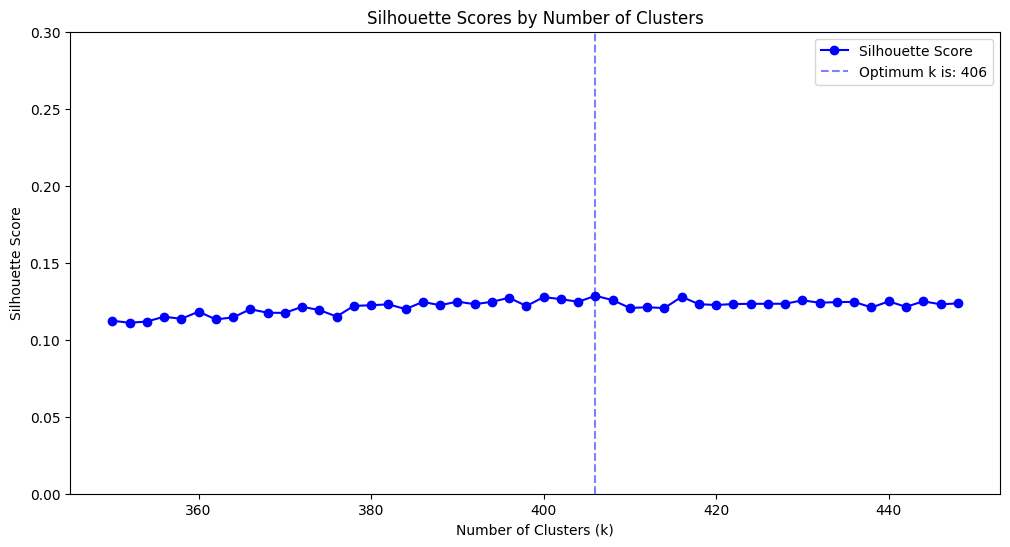

In [33]:
# More specific search for optimum k
k_values = range(350, 450, 2)
calc_kmeans(X_topic_comments_all, k_values)

In [28]:
# Implement cosine_similarity with thresholding for grouping the results
clusters_topics_all = calc_cosine_threshold(X_topic_comments_all)

For threshold 0.1 the number of topics is: 61
For threshold 0.2 the number of topics is: 166
For threshold 0.3 the number of topics is: 291
For threshold 0.4 the number of topics is: 367
For threshold 0.5 the number of topics is: 407


### TRANSFORM COMMENTS INTO EMBEDDINGS AND CALC COSINE SIMILARITY WITH THRESHOLDING

In [29]:
%%capture
# !pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

# Import our model
model = SentenceTransformer('lighteternal/stsb-xlm-r-greek-transfer')

#### DEFINE A FUNCTION FOR THE CALC OF COSINE SIMILARITY

In [30]:
def calc_cosine_embedding(embeddings):
    """
    Calculate the cosine similarity score between all embeddings 
    :param embeddings: tensor embedding matrix 
    :return: tensor cosine similarity scores for embedding matrix
    """
    all_cosine_scores = []
    for target_embedding in embeddings:
        # Compute cosine similarities
        cosine_scores = util.pytorch_cos_sim(target_embedding, embeddings)
        cosine_scores_numpy = cosine_scores.cpu().numpy()
        all_cosine_scores.append(cosine_scores_numpy)
    # Print the similarities
    print("Similarities with the first sentence:")
    for i in range(len(embeddings)):
        print(f"Similarity with sentence {i + 1}: {all_cosine_scores[0][0][i].item():.4f}")

    return all_cosine_scores

#### CHECK IF WE HAVE SAME COMMENTS IN OUR DATASET. IF SO WE WILL REMOVE THEM IN BOTH COMMENTS AND TOPICS

In [31]:
all_comments_set = set(all_comments)
print(f'The length of all comments is: {len(all_comments)}')

print(f'The length of all comments without duplicates is: {len(all_comments_set)}')

The length of all comments is: 123
The length of all comments without duplicates is: 113


#### CHECK IF WE HAVE SAME TOPICS IN OUR DATASET

In [32]:
all_topics_set = set(topic_comments_flattened)
print(f'The length of all comments is: {len(topic_comments_flattened)}')

print(f'The length of all comments without duplicates is: {len(all_topics_set)}')

The length of all comments is: 504
The length of all comments without duplicates is: 478


In [33]:
# Convert our set list into np.array
all_comments_final = [comment for comment in all_comments_set]

# Generate embeddings for all comments
embeddings_comments = model.encode(all_comments_final, convert_to_tensor=True)
# Calculate the cosine similarity scores between all embeddings of comments
cosine_scores_comments = calc_cosine_embedding(embeddings_comments)

Similarities with the first sentence:
Similarity with sentence 1: 1.0000
Similarity with sentence 2: 0.5478
Similarity with sentence 3: 0.5007
Similarity with sentence 4: 0.6504
Similarity with sentence 5: 0.5934
Similarity with sentence 6: 0.6289
Similarity with sentence 7: 0.4536
Similarity with sentence 8: 0.5133
Similarity with sentence 9: 0.6590
Similarity with sentence 10: 0.4411
Similarity with sentence 11: 0.3957
Similarity with sentence 12: 0.5055
Similarity with sentence 13: 0.5051
Similarity with sentence 14: 0.5860
Similarity with sentence 15: 0.5553
Similarity with sentence 16: 0.6851
Similarity with sentence 17: 0.5490
Similarity with sentence 18: 0.5889
Similarity with sentence 19: 0.1876
Similarity with sentence 20: 0.6797
Similarity with sentence 21: 0.6470
Similarity with sentence 22: 0.4746
Similarity with sentence 23: 0.4126
Similarity with sentence 24: 0.5854
Similarity with sentence 25: 0.5578
Similarity with sentence 26: 0.6146
Similarity with sentence 27: 0.5758

In [43]:
from sklearn.preprocessing import normalize

embeddings_comments_cpu = embeddings_comments.cpu()

# Example: L2 normalization
normalized_embeddings = normalize(embeddings_comments_cpu, norm='l2')

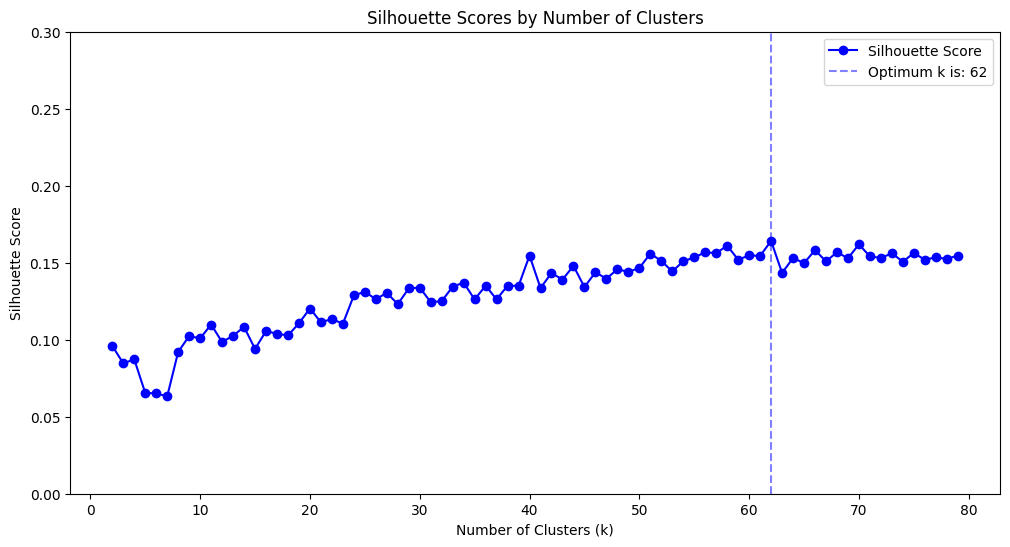

In [47]:
k_values = range(2, 80)

calc_kmeans(normalized_embeddings, k_values)

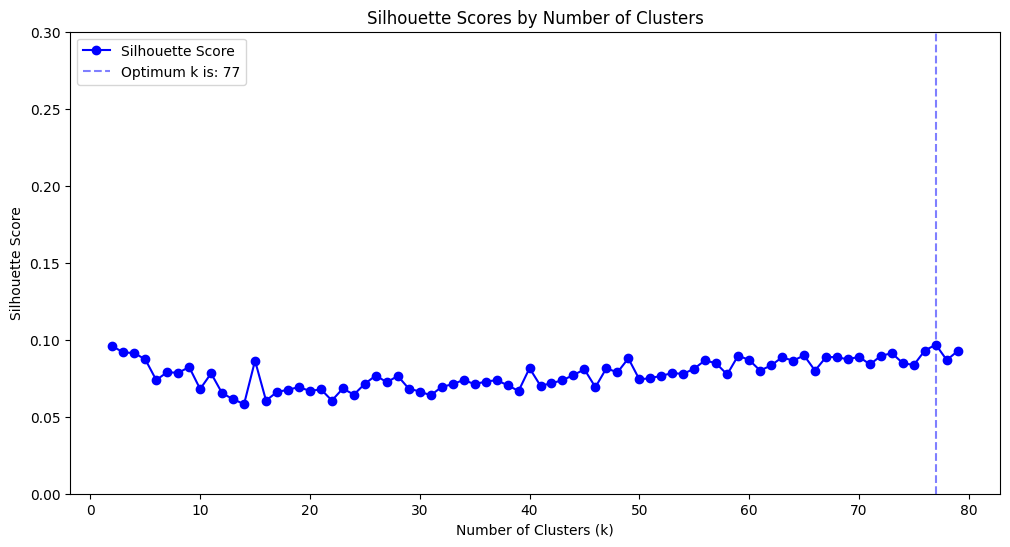

In [49]:
all_topics_final = [topic for topic in all_topics_set]

# Generate embeddings for all comments
embeddings_topics = model.encode(all_topics_final, convert_to_tensor=True)

embeddings_topics_cpu = embeddings_topics.cpu()

# Example: L2 normalization
normalized_embeddings_topics = normalize(embeddings_topics_cpu, norm='l2')

calc_kmeans(normalized_embeddings_topics, k_values)

In [57]:
optimum_k = 15

# Assuming embeddings is your embeddings matrix and k is the number of clusters
kmeans = KMeans(n_clusters=optimum_k, random_state=0).fit(normalized_embeddings_topics)
labels = kmeans.labels_

# Initialize a dictionary to hold clusters
cluster_topics_final = {i: [] for i in range(optimum_k)}

for cluster, topic in zip(labels, all_topics_final):
        cluster_topics_final[cluster].append(topic) 
    

The length of cluster with number 1 is: 32
The length of cluster with number 2 is: 35
The length of cluster with number 3 is: 71
The length of cluster with number 4 is: 52
The length of cluster with number 5 is: 29
The length of cluster with number 6 is: 15
The length of cluster with number 7 is: 29
The length of cluster with number 8 is: 15
The length of cluster with number 9 is: 28
The length of cluster with number 10 is: 33
The length of cluster with number 11 is: 20
The length of cluster with number 12 is: 25
The length of cluster with number 13 is: 34
The length of cluster with number 14 is: 37
The length of cluster with number 15 is: 23


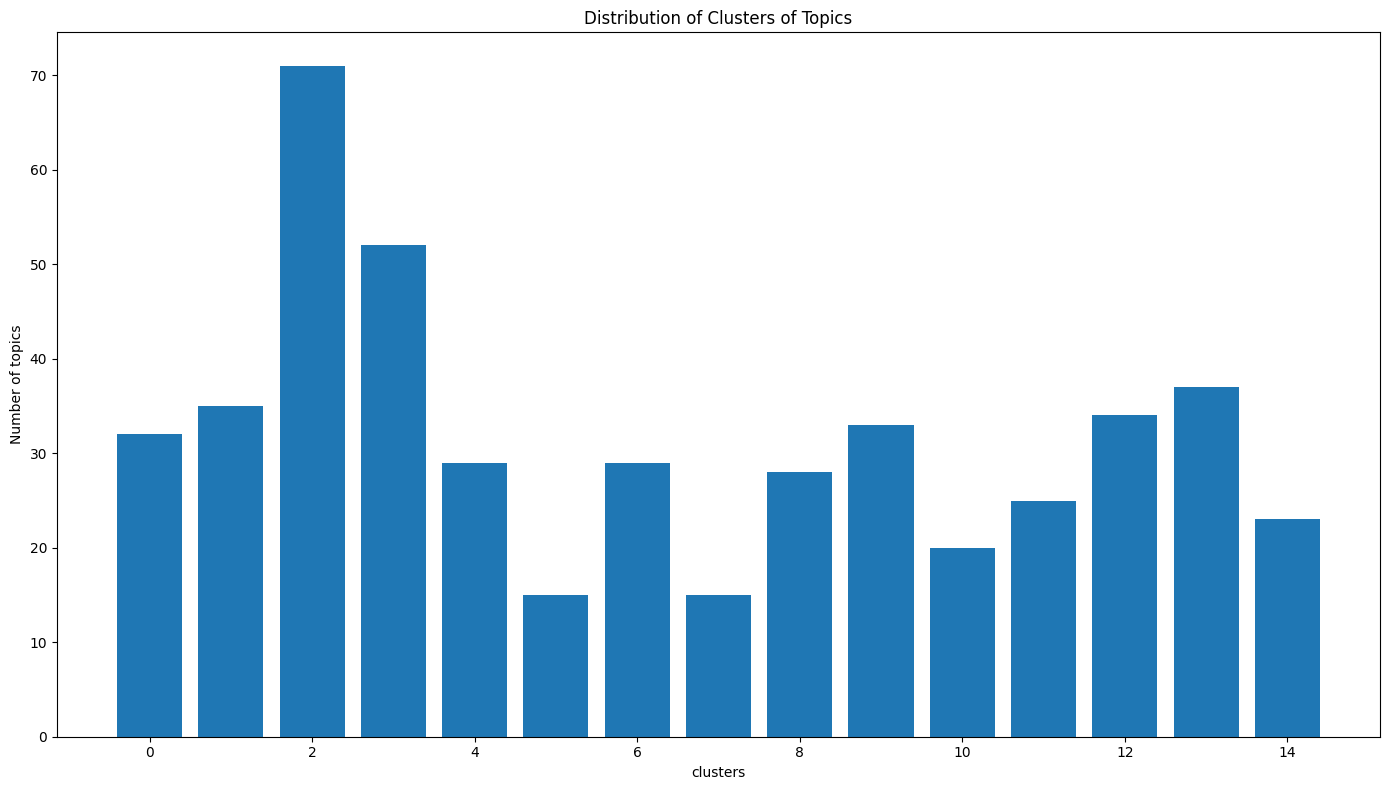

In [75]:
keys_count = []
length_clusters = []

for key, value in cluster_topics_final.items():
    print(f'The length of cluster with number {key+1} is: {len(value)}')
    keys_count.append(key)
    length_clusters.append(len(value))

plt.figure(figsize=(14, 8))
plt.bar(x=keys_count, height=length_clusters)
plt.title('Distribution of Clusters of Topics')
plt.xlabel('clusters')
plt.ylabel('Number of topics')

plt.tight_layout()

plt.show()

In [84]:
import time
from tqdm import tqdm

summaries_topics_GPT = []
for i in tqdm(range(len(cluster_topics_final.items()))):
    GPT_prompts = PromptingGPT() # Create a new instance of GPT model in each iteration
    comments = list(cluster_topics_final[i])
    prompt = f"""
    Hello my good model, I would like to create a summary of 50-100 words for a group of comments. 
    The comments are from the Ministry of Defence and the topic of discussion is: 
    "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων". 
    I will provide you the comments and I would like you to create the summary in order the Minister of Defense 
    and his assistants, to be able to comprehend the whole discussion and its most important points. 
    Do not include any introduction in your response, but only the most important topics/insights from the comments.
    Please I would like the summary to be in Greek language as the comments are.
    Comments: {comments}
    """
    summaries_topics_GPT.append(GPT_prompts.make_prompts(prompt))

  7%|█████████▌                                                                                                                                     | 1/15 [00:08<01:59,  8.52s/it]

Τα σχόλια από το Υπουργείο Άμυνας αναφέρουν την ανάγκη εξασφάλισης κοινωνικής δικαιοσύνης και διαφάνειας στις συνταξιοδοτικές διαδικασίες των αξιωματικών. Τονίζεται η ανάγκη αναθεώρησης των κριτηρίων συνταξιοδότησης για ισότιμη μεταχείριση ανεξαρτήτως εισόδου στον στρατό. Προτείνεται νομοθετική διάταξη για την αποκατάσταση δικαιοσύνης για τους εκπροθέσμως αποχωρήσαντες. Επισημαίνεται η ανάγκη δικαιοσύνης στην παραμονή υπαξιωματικών μετά τα 35 έτη υπηρεσίας και η ενσωμάτωση των πρόωρα αποστρατευθέντων στη νομοθεσία.


 13%|███████████████████                                                                                                                            | 2/15 [00:17<01:55,  8.87s/it]

Η συζήτηση στο Υπουργείο Άμυνας αναφέρεται σε πολλές σημαντικές πτυχές. Υπάρχει ανάγκη βελτίωσης του συστήματος αξιολόγησης και μεταθέσεων, ενημερωτικών προγραμμάτων για το προσωπικό και διαφάνειας στη διαχείριση των αιτήσεων-αναφορών. Απαιτείται ενίσχυση των μέτρων ενημέρωσης και εκπαίδευσης για το προσωπικό, καθώς και συνεργασία με τους ενδιαφερόμενους φορείς. Επιπλέον, η διασφάλιση ίσης μεταχείρισης, η κατανόηση των αλλαγών και η συνεργασία για την επιτυχή εφαρμογή των μέτρων είναι θέματα προτεραιότητας.


 20%|████████████████████████████▌                                                                                                                  | 3/15 [00:40<03:04, 15.34s/it]

Συνοψίζοντας τα σχόλια από το Υπουργείο Άμυνας πάνω στο θέμα "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων", οι βασικές προτάσεις περιλαμβάνουν τη διεύρυνση των ηλικιακών ορίων για παραμονή στον στρατό, την επέκταση των ευκαιριών για τη συνέχιση υπηρεσίας μετά τη συνταξιοδότηση, τη διαφάνεια στις διαδικασίες αξιολόγησης και προαγωγής, καθώς και τη διασφάλιση ίσων ευκαιριών και μεταχείρισης για τους αξιωματικούς. Προτείνεται επίσης η ανάγκη νομοθετικών ρυθμίσεων που θα εξυπηρετούν τη διατήρηση εμπειρικών στελεχών και τη διαχείριση της συνταξιοδότησης για αποτελεσματικότερη λειτουργία των Ενόπλων Δυνάμεων.


 27%|██████████████████████████████████████▏                                                                                                        | 4/15 [00:49<02:22, 12.96s/it]

Στα σχόλια του Υπουργείου Άμυνας γίνεται αναφορά στην πρόβλεψη και ενημέρωση για τις μελλοντικές ρυθμίσεις στον στρατό. Αναδεικνύεται η ανάγκη διατήρησης εμπειρικών στελεχών και πρόβλεψης για το μέλλον των δυνάμεων. Επισημαίνεται η σημασία της εμπειρίας και προσφοράς των στελεχών στην εθνική άμυνα. Αναφέρεται και η ανάγκη για διαφανείς διαδικασίες και αναγνώριση της εμπειρίας στον στρατό. Συνοψίζοντας, υπογραμμίζεται η ανάγκη διατήρησης, αξιολόγησης και επιβράβευσης των εμπειρικών στελεχών για την αποδοτική λειτουργία των Ενόπλων Δυνάμεων.


 33%|███████████████████████████████████████████████▋                                                                                               | 5/15 [01:01<02:06, 12.62s/it]

Στα σχόλια του Υπουργείου Άμυνας σχετικά με τις "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων", επισημαίνονται οι ακόλουθες σημαντικές πτυχές:
- Αξιολόγηση της πολιτικής για τη συνταξιοδότηση στον στρατό, με έμφαση στη συμβολή και αποδοτικότητα των ατόμων πάνω από 52 ετών.
- Δημιουργία διαδικασιών για τη μετάβαση από την υπηρεσία στη σύνταξη, λαμβάνοντας υπόψη την οικονομική πτυχή και την κατάσταση των ατόμων.
- Εφαρμογή ισότιμων μέτρων στα θέματα συνταξιοδότησης για όλους τους πολίτες.
- Αντιμετώπιση της κοινωνικής αδικίας που προκαλείται από πρόωρη αποστρατεία.
- Ενημερωτικά προγράμματα και υποστήριξη για το προσωπικό για την κατανόηση των αλλαγών στις συνταξιοδοτικές πολιτικές.


 40%|█████████████████████████████████████████████████████████▏                                                                                     | 6/15 [01:23<02:20, 15.59s/it]

Συνοψίζοντας τα σχόλια από το Υπουργείο Άμυνας για το θέμα "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων", το σημαντικότερα σημεία περιλαμβάνουν: η διασφάλιση ισότιμης μεταχείρισης και δικαιοσύνης μέσω σαφών κανόνων, η ανάγκη για διαφάνεια και ισότιμη μεταχείριση σε θέματα πρόσληψης, η ισότιμη μεταχείριση στη χορήγηση επιδόματος επικινδυνότητας, και η ανάγκη για δικαιοσύνη και ισονομία για όλους τους αξιωματικούς. Επίσης, έγινε αναφορά στην ανάγκη εξέτασης των επιπτώσεων στη μεταχείριση των αξιωματικών λόγω των νέων αλλαγών στη νομοθεσία.


 47%|██████████████████████████████████████████████████████████████████▋                                                                            | 7/15 [01:32<01:47, 13.44s/it]

Η συζήτηση στο Υπουργείο Άμυνας επικεντρώνεται στη διαφάνεια, ισότιμη μεταχείριση και αξιολόγηση των αξιωματικών στο στρατό, συμπεριλαμβανομένων των ΕΟΘ. Αναδεικνύονται οι ανάγκες για δίκαια κριτήρια αξιολόγησης, διαφάνεια στη διαχείριση των μονάδων, ισότιμη μεταχείριση σε θέματα προαγωγής και αντιμετώπισης διακρίσεων, καθώς και διασφάλιση δικαιοσύνης και ίσων ευκαιριών για όλους τους αξιωματικούς. Ολοκληρώνοντας, επισημαίνεται η ανάγκη για διαφάνεια και δικαιοσύνη σε κάθε στάδιο της διαδικασίας παραμονής και επιστροφής στην υπηρεσία.


 53%|████████████████████████████████████████████████████████████████████████████▎                                                                  | 8/15 [01:38<01:18, 11.25s/it]

Στα σχόλια του Υπουργείου Άμυνας συζητείται η ανάγκη επίλυσης αδικιών για τους υπαξιωματικούς που εισήχθησαν στις στρατιωτικές σχολές το 1990 και μετά. Αναφέρεται επίσης η ανάγκη για ανακάλυψη των αδικιών σε σχέση με την κατάταξη του 1990 και η δυνατότητα διόρθωσής τους μέσω της συμπερίληψής τους στο νόμο 2439. Απαριθμούνται επίσης ζητήματα όπως η ανάγκη για ισότιμη μεταχείριση και η ανακάλυψη αδικιών λόγω αλλαγών στη νομοθεσία.


 60%|█████████████████████████████████████████████████████████████████████████████████████▊                                                         | 9/15 [01:47<01:01, 10.32s/it]

Τα σημαντικότερα σημεία που αναδεικνύονται από τα σχόλια του Υπουργείου Άμυνας σχετικά με το θέμα "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων" είναι:
- Ανάγκη για διαφάνεια και ισότιμη μεταχείριση στην εφαρμογή του νόμου.
- Ανάγκη για εφαρμογή ασφαλιστικών δικλείδων ώστε να αποφευχθούν επικίνδυνοι ατροποί.
- Η σημασία της επικοινωνίας και της αμοιβαιότητας μεταξύ κράτους, επιχειρήσεων και στελεχών.
- Ανάγκη για διαφάνεια στην διαδικασία λήψης αποφάσεων και υιοθέτησης μέτρων.
- Ανάγκη για διορθωτικά μέτρα για αντιμετώπιση αδικιών και διακρίσεων.


 67%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 10/15 [01:55<00:47,  9.59s/it]

Στα σχόλια από το Υπουργείο Άμυνας σχετικά με τις ειδικές κατηγορίες αξιωματικών εκτός οργανικών θέσεων, αναφέρονται η παύση των αξιωματικών από επικίνδυνες αποστολές, η διατήρηση οικονομικών επιδομάτων για ενεργούς στελέχη, η ανάγκη εξέτασης των κινήτρων αποχώρησης, και η πιθανότητα επαναφοράς εμπειρικών αξιωματικών. Επίσης, συζητείται η διαχείριση του προσωπικού και η ανάγκη για διαφάνεια στις διαδικασίες αξιολόγησης και απόφασης επί των επιδομάτων.


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 11/15 [02:03<00:37,  9.29s/it]

Στα σχόλια αναφέρεται η ανάγκη για ενεργό συμμετοχή και διάλογο των ενδιαφερομένων, υποβολή προτάσεων για βελτίωση του νομοσχεδίου και αντιμετώπιση προβλημάτων. Επισημαίνεται η ανάγκη για γρήγορη ψήφιση του νόμου και διευκρίνιση σχετικά με τον χαρακτηρισμό ΕΟΘ. Απαιτείται εξήγηση των μέτρων του νομοσχεδίου και ενσωμάτωση καταταγεγέντων του 1990 στον νόμο. Αναγνωρίζεται η ανάγκη για ταχεία μετατροπή της πρότασης σε νομοσχέδιο και επίλυση προβλημάτων από παλαιότερα νομοθετήματα.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 12/15 [02:14<00:28,  9.62s/it]

Συνοψίζοντας τα σχόλια από το Υπουργείο Άμυνας για τις "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων", τα σημαντικότερα σημεία περιλαμβάνουν την αξιοποίηση εμπειρίας των στελεχών, τη δυνατότητα μετάδοσης γνώσεων χωρίς ρίσκο ενέργειας, τη συνεχή εκπαίδευση, την ισορροπία μεταξύ νέων και έμπειρων ανθρώπων, και την ενίσχυση μετοχικών ταμείων. Επισημαίνεται η αξία της εμπειρίας για το γενικό όφελος, καθώς και η αναγνώριση της συνεισφοράς των εμπειρικών στελεχών προς τον ελληνικό λαό. Τέλος, υπογραμμίζεται η σημασία της μετάδοσης γνώσεων χωρίς ανάληψη επικίνδυνων ενεργειών και η ελπίδα για ανάλυση της εμπειρίας νέων αξιωματικών.


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 13/15 [02:20<00:17,  8.67s/it]

Η συζήτηση στο Υπουργείο Εθνικής Άμυνας επικεντρώνεται σε θέματα όπως η αξιολόγηση των αναγκών των αξιωματικών στις Ενόπλες Δυνάμεις, η ανάγκη για συνεργασία και συναίνεση σε αποφάσεις που τους αφορούν, και η ενίσχυση της εμπιστοσύνης του κοινού. Το προτεινόμενο νομοσχέδιο αντιμετωπίζεται θετικά, αλλά χρειάζεται σαφήνεια και εκπαίδευση του προσωπικού. Οι αξιωματικοί έχουν επίσης θέματα διοίκησης και περιβαλλοντικής υπηρεσίας που απαιτούν προσοχή.


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 14/15 [02:27<00:08,  8.12s/it]

Στα σχόλια προτείνεται η ανάγκη τροποποίησης της διάταξης για τη διατήρηση αξιωματικών με πενταετές συμβόλαιο. Επίσης, αναφέρεται η απορία για την επιστροφή αποστρατευμένων στις Ένοπλες Δυνάμεις και η εμπέδωση της παραμονής μέχρι τα 58 έτη για ανωτέρους αξιωματικούς. Η συνέχιση παραμονής για 5 έτη προτείνεται για την αξιοποίηση εμπειρίας και η επίλυση θεμάτων σχετικά με τη συνταξιοδότηση. Υπάρχει επίσης αίτημα για άμεση εφαρμογή μέτρων για την επιστροφή των αξιωματικών.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [02:36<00:00, 10.41s/it]

Συνοψίζοντας τη συζήτηση από το Υπουργείο Άμυνας σχετικά με τις "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων", οι βασικές προτάσεις περιλαμβάνουν την ανάγκη για ισότιμη μεταχείριση σε θέματα συνταξιοδότησης και παραμονής στο στράτευμα, την εφαρμογή ισορροπημένης μεταχείρισης για όλους τους αποστράτους, καθώς και τη διασφάλιση δικαιοσύνης και ισότητας στη διαδικασία λήψης αποφάσεων. Επίσης, τονίζεται η ανάγκη για εκπαίδευση και ευαισθητοποίηση του προσωπικού σε θέματα ισότητας και δικαιοσύνης στην υπηρεσία, καθώς και η ανάγκη για ομαλότητα και βελτίωση του εργασιακού βίου με αξιοκρατία και αξιοπιστία.


In [89]:
import textwrap

def print_summary(final_summary):
    """
    Give a text and print it in a more beautiful format
    :param final_summary: str of final summary
    :return: print in a better format the summary
    """
    # Split the text into paragraphs
    paragraphs = final_summary.split('\n\n')  # Assuming paragraphs are separated by two newlines

    # Wrap each paragraph using textwrap
    wrapped_text = '\n\n'.join(textwrap.fill(paragraph, width=140) for paragraph in paragraphs if paragraph)

    print(wrapped_text)

for i, summary in enumerate(summaries_topics_GPT):
    print(f'Για την ομάδα σχολίων Νο {i+1} παράχθηκε η ακόλουθη περίληψη: ')
    print_summary(summary)
    print('-------------------------------------------------------------------------------')

Για την ομάδα σχολίων Νο 1 παράχθηκε η ακόλουθη περίληψη: 
Τα σχόλια από το Υπουργείο Άμυνας αναφέρουν την ανάγκη εξασφάλισης κοινωνικής δικαιοσύνης και διαφάνειας στις συνταξιοδοτικές διαδικασίες
των αξιωματικών. Τονίζεται η ανάγκη αναθεώρησης των κριτηρίων συνταξιοδότησης για ισότιμη μεταχείριση ανεξαρτήτως εισόδου στον στρατό.
Προτείνεται νομοθετική διάταξη για την αποκατάσταση δικαιοσύνης για τους εκπροθέσμως αποχωρήσαντες. Επισημαίνεται η ανάγκη δικαιοσύνης στην
παραμονή υπαξιωματικών μετά τα 35 έτη υπηρεσίας και η ενσωμάτωση των πρόωρα αποστρατευθέντων στη νομοθεσία.
-------------------------------------------------------------------------------
Για την ομάδα σχολίων Νο 2 παράχθηκε η ακόλουθη περίληψη: 
Η συζήτηση στο Υπουργείο Άμυνας αναφέρεται σε πολλές σημαντικές πτυχές. Υπάρχει ανάγκη βελτίωσης του συστήματος αξιολόγησης και μεταθέσεων,
ενημερωτικών προγραμμάτων για το προσωπικό και διαφάνειας στη διαχείριση των αιτήσεων-αναφορών. Απαιτείται ενίσχυση των μέτρων ενημέρωσης
και

In [ ]:
"""
Hello my good model, I would like to create a summary of 300 words for an article and its comments. 
    The article is from the Ministry of Defence and the topic of discussion is: 
    "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων". 
    I will provide you the comments and I would like you to create the summary in order the Minister of Defense 
    to be able to comprehend the whole discussion and its most important points. Please I would like the summary
    to be in Greek language as the comments are. Additionaly, I will give you some insights by the exploratory 
    The average word count for the comments is 95 words. Finally, for each comment I have removed special tokens and digits, 
    so be careful with the connections of the words and the meanings. Finally I am going to give you the summaries of the previous
    comments in order to be able to check the history of the previous comments.
    Please write me an efficient summary with all the insights from the comments. Thank you
    Here are the history of the previous summaries of the previous comments: {summary_each_12_unclustered}
    Here are the comments I would like to create a summary in Greek language: + {comments}
    """
    summary_each_12_unclustered.append(GPT_prompts.make_prompts(prompt))        

In [38]:
import numpy as np

def calc_similarity_threshold(cosine_sim):
    """
    Group texts via cosine similarity and thresholding
    :param cosine_sim: 3D numpy array containing cosine similarity scores
    :return: List of dictionaries representing clusters for each threshold
    """
    thresholds = [0.1 * i for i in range(4, 9)]
    clusters_all_thres = []

    for threshold in thresholds:
        # Initialize clusters as a list of sets
        clusters = []

        for idx in range(len(cosine_sim)):
            # Find existing cluster where this index might belong
            merged_into_existing = False
            for cluster in clusters:
                if any(cosine_sim[idx][0][other_idx] > threshold for other_idx in cluster):
                    cluster.add(idx)
                    merged_into_existing = True
                    break

            if not merged_into_existing:
                # If not merged, it starts a new cluster
                similar_indices = {i for i in np.where(cosine_sim[idx][0] > threshold)[0]}
                clusters.append(similar_indices)

        # Merge overlapping clusters
        merged_clusters = []
        while clusters:
            first, *rest = clusters
            first = set(first)

            lf = -1
            while lf != len(first):
                lf = len(first)
                rest2 = []
                for r in rest:
                    if len(first.intersection(r)) == 0:
                        rest2.append(r)
                    else:
                        first |= r
                rest = rest2
            merged_clusters.append(first)
            clusters = rest

        clusters_all_thres.append({i: list(cluster) for i, cluster in enumerate(merged_clusters)})
        print(f'For threshold {threshold:.1f}, the number of clusters is: {len(merged_clusters)}')

    return clusters_all_thres

# Example of how to call this function with cosine_scores_comments
# Assuming cosine_scores_comments is already calculated and properly formatted
cluster_transformer_comments = calc_similarity_threshold(np.array(cosine_scores_comments))

For threshold 0.4, the number of clusters is: 1
For threshold 0.5, the number of clusters is: 2
For threshold 0.6, the number of clusters is: 10
For threshold 0.7, the number of clusters is: 26
For threshold 0.8, the number of clusters is: 65


In [37]:
key_previous = -1

for key, value in cluster_transformer_comments[3].items():
    print(f"For cluster {key+1} the topics are: {value}", end='')
    if key_previous != key:
        print("---------------------------------------------------------------------------------------------------------------------------")
    key_previous = key

For cluster 1 the topics are: [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 24, 25, 27, 28, 30, 33, 34, 35, 37, 39, 40, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 69, 71, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 95, 96, 97, 102, 103, 104, 105, 106, 107, 111, 112]---------------------------------------------------------------------------------------------------------------------------
For cluster 2 the topics are: [1, 99, 41]---------------------------------------------------------------------------------------------------------------------------
For cluster 3 the topics are: [9]---------------------------------------------------------------------------------------------------------------------------
For cluster 4 the topics are: [101, 13]---------------------------------------------------------------------------------------------------------------------------
For cluster 5 the topics are: [18

In [136]:
indexes = set()
for j, score in enumerate(cosine_scores_comments[1][0]):
    if j==1:
        pass
    elif score.item()>=0.70:
        indexes.add(j)
        print(all_comments_final[1])
        print('vs')
        print(all_comments_final[j])
        print(j)
        print('--------------------------------------------------------------------------------------------------------------')

καταρχάς έχουμε πέσει για τα καλά στην παγίδα του ότι είμαστε ευνοούμενος κλάδος με μικρό ηλικιακό κλπ. λέτε κάποιοι ότι είναι κοινωνική αδικία να βγαίνουμε στα 53 κάνεις δεν βλέπω να λέει η να θυμάται ότι όλοι εμείς έχουμε εργασιακή σχέση από τα 17 18 19 μας χρόνια δεν μας χάρισε κάνεις γιατί να νοιώθουμε ¨ένοχοι¨ όταν έχουμε τηρήσει τα του νόμου που διέπει την κάθε κατηγορία από μας όσο αφορά το συγκεκριμένο άρθρο στο προτεινόμενο σχέδιο νόμου είναι καλή πρωτοβουλία και τίμια η τήρηση των δεσμεύσεως του κου υεθα για όποιον συνάδελφο επιθυμεί να συνεχίσει την υπηρεσία του βέβαια είναι πολύ πρόχειρο και αυτό δημιουργεί ένα αίσθημα αβεβαιότητας στις λεπτομέρειες που δεν βλέπουμε να είναι γραμμένες τι εννοώ εφαπαξ εισφορές συντάξιμα μεταθέσεις υπηρεσίες καθήκοντα ιεραρχικό κ.λ.π που είναι άκρος σοβαρά πρέπει να υπάρξουν εξ αρχής επεξηγήσεις για το λόγο του ότι οι εποχές είναι δύσκολες και ευεργετικά μέτρα όπως αυτό δεν πρέπει να προβληματίζου για την επόμενη ημέρα
vs
πολύ καλή εξέλιξη γι

In [142]:
indexes = set()
for j, score in enumerate(cosine_scores_comments[0][0]):
    if j==0:
        pass
    elif score.item()>=0.60:
        indexes.add(j)
        print(all_comments_final[0])
        print('vs')
        print(all_comments_final[j])
        print(j)
        print('--------------------------------------------------------------------------------------------------------------')

ικανοποιητική αυτή η εξέλιξη για όσους συναδέλφους επιθυμούν να συνεχίσουν και πέραν της 35ετιας να προσφέρουν την εμπειρία τους και τις υπηρεσίες τους στις ε.δ ηθικό ομως θα ήταν και οι σειρές ασσυ κατάταξης του έτους 1990 να συμπεριληφθούν στον ν. 2439/96 όπως έγινε και με τις δύο 2) προηγούμενες σειρές κατάταξη 1988-1989 προς κλιμάκωση της βαθμολογικής εξέλιξης αποκατάσταση της υφιστάμενης αδικίας και ίσης αντιμετώπισης
vs
αξιότιμε κύριε υπουργέ σαφώς και είναι προς την σωστή κατεύθυνση η παραμονή των στελεχών των εδ και περαν των 35 ετών φτάνει αυτό να γίνεται με σεβασμό προς αυτά που έχουν προσφέρει συνολικά στην υπηρεσια τους και όχι εκδικητικά από την πολιτεια ως επαίτες δηλαδή και άχρηστους και για να αποφύγουμε αυτούς τους επικύνδινους ατροπούς θα έπρεπε να μπουν ασφαλιστικές δικλείδες προς αυτή την κατεύθυνση μεταθέσεις ασφαλιστικές εισφορές εφαπαξ κλπ.
2
--------------------------------------------------------------------------------------------------------------
ικανοποιητι

In [144]:
for i, comment in enumerate(all_comments):
    if 'εξέλιξη για όσους συναδέλφους' in comment:
        print(i)
        print(comment)
        print('------------------------------------------------------------------------------------------------------------------------')

1
ευχάριστη εξέλιξη για όσους συναδέλφους εχουν κλείσει 35ετία και θέλουν να συνεχίσουν λίγο ακόμη σε ενέργεια ταυτόχρονα κλείνουν και στόματα πολιτών που κατηγορούν εμάς οτι φεύγουμε νωρίς για συνταξιοδότηση
------------------------------------------------------------------------------------------------------------------------
3
πολύ καλή εξέλιξη για όσους συναδέλφους επιθυμούν να συνεχίσουν και πέραν της 35ετιας να προσφέρουν την εμπειρία τους και τις υπηρεσίες τους στις ε.δ μας δίνεται η δυνατότητα να εργαστούμε στο αντικείμενο που αγαπήσαμε βιώσαμε και αποτελεί το μεγαλύτερο κομμάτι της ζωής μας πάρα ταύτα τα στελέχη των ειδικών δυνάμεων του πολεμικού ναυτικού υ κτ πως θα συνεχίσουν να επιχειρούν και να μεταδίδουν την εμπειρία τους και τις γνώσεις τους χωρίς να καταδύονται ή να πέφτουν με το αλεξίπτωτο κόβοντας αυτό το προνόμιο και το οικονομικό επίδομα πως θα διδάξει καταδύσεις κάποιος χωρίς να καταδυθεί οπωσδήποτε είναι μια πολύ καλή εξέλιξη που δίνει την δυνατότητα σε στελέχη να

In [93]:
indexes_comments = set()
for i in range(len(embeddings_comments)):
    for j, score in enumerate(cosine_scores_comments[i][0]):
        if j==i:
            continue
        if score.item()>=0.5:
            indexes_comments.add(j)

In [119]:
# Convert our set list into np.array
all_topics_final = [comment for comment in all_topics_set]
print(len(all_topics_final))

# Generate embeddings for all topic sentences
embeddings_topics = model.encode(all_topics_final, convert_to_tensor=True)

# Calculate the cosine similarity scores between all embeddings of comments
cosine_scores_topics = calc_cosine_embedding(embeddings_topics)

478
Similarities with the first sentence:
Similarity with sentence 1: 1.0000
Similarity with sentence 2: -0.0038
Similarity with sentence 3: 0.0554
Similarity with sentence 4: 0.1752
Similarity with sentence 5: 0.1223
Similarity with sentence 6: 0.1307
Similarity with sentence 7: 0.1929
Similarity with sentence 8: 0.0649
Similarity with sentence 9: 0.1516
Similarity with sentence 10: 0.0754
Similarity with sentence 11: 0.0964
Similarity with sentence 12: 0.1237
Similarity with sentence 13: 0.1190
Similarity with sentence 14: 0.1585
Similarity with sentence 15: 0.1844
Similarity with sentence 16: 0.1011
Similarity with sentence 17: 0.0926
Similarity with sentence 18: 0.0836
Similarity with sentence 19: 0.0495
Similarity with sentence 20: 0.1434
Similarity with sentence 21: 0.0227
Similarity with sentence 22: 0.0799
Similarity with sentence 23: 0.0520
Similarity with sentence 24: 0.2681
Similarity with sentence 25: 0.2782
Similarity with sentence 26: 0.1486
Similarity with sentence 27: 0

In [124]:
example = calc_similarity_threshold(np.array(cosine_scores_topics))

For threshold 0.4, the number of clusters is: 2
For threshold 0.5, the number of clusters is: 3
For threshold 0.6, the number of clusters is: 9
For threshold 0.7, the number of clusters is: 53
For threshold 0.8, the number of clusters is: 217


In [125]:
for key, value in example[2].items():
    print(f"For cluster {key+1} the topics are: {value}", end='')
    if key_previous != key:
        print("---------------------------------------------------------------------------------------------------------------------------")
    key_previous = key

For cluster 1 the topics are: [0]---------------------------------------------------------------------------------------------------------------------------
For cluster 2 the topics are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186

In [68]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes
for i in range(len(embeddings)):
    G.add_node(i)

# Add edges based on cosine similarity threshold
threshold = 0.7
for i in range(len(embeddings)):
    for j in range(i + 1, len(embeddings)):
        if all_cosine_scores[i][0][j].item() > threshold:
            G.add_edge(i, j)

# Find connected components
connected_components = list(nx.connected_components(G))

# Print the connected components
print("Groups based on cosine similarity > 0.7:")
for idx, component in enumerate(connected_components):
    print(f"Group {idx + 1}: {component}")

# If you want to see which sentences belong to each group
for idx, component in enumerate(connected_components):
    print(f"Group {idx + 1}: {[topic_comments_flattened[i] for i in component]}")


NameError: name 'embeddings' is not defined

In [67]:
# Create a new graph for plotting
group_graph = nx.Graph()

# Add a node for each group, size proportional to the number of elements in the group
sizes = []
for idx, component in enumerate(connected_components):
    group_graph.add_node(idx, size=10*len(component))  # Multiplying by 10 for better visualization
    sizes.append(10*len(component))

# Optionally add edges between groups if you have such relations defined (skipped here for simplicity)

# Draw the graph
plt.figure(figsize=(14, 8))
pos = nx.spring_layout(group_graph)  # Positions for all nodes
nx.draw_networkx_edges(group_graph, pos, alpha=0.3)
nx.draw_networkx_nodes(group_graph, pos, node_size=sizes, node_color='blue', alpha=0.6)
nx.draw_networkx_labels(group_graph, pos)
plt.title('Graph of Topic Groups')
plt.show()

NameError: name 'connected_components' is not defined